## Set Up and Hello World

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account.
QiskitRuntimeService.save_account(overwrite=True, channel="ibm_quantum", token="818301ddb1a98a2df3cc203c800d944e0f5a1e38dabb4a0fd3cd2db2bee19e667802dbade73b917b084782b56f030cc1e367931a2eea3adc466826a1a1eb2696")


In [2]:
from qiskit.test.reference_circuits import ReferenceCircuits
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
program_inputs = {'iterations': 1}
options = {"backend_name": "ibmq_qasm_simulator"}
job = service.run(program_id="hello-world",
                options=options,
                inputs=program_inputs
                )
print(f"job id: {job.job_id}")
result = job.result()
print(result)

job id: cahbsae8jrdfemu7gkp0
Hello, World!


## Grover

In [3]:
import random
from qiskit.quantum_info import Statevector

secret = random.randint(0,31)  # the owner is randomly picked
secret_string = format(secret, '05b')  # format the owner in 14-bit string
oracle = Statevector.from_label(secret_string)  # let the oracle know the owner

print(f"pw = {secret}, in binary string = {secret_string}")

pw = 16, in binary string = 10000


In [4]:
from qiskit.algorithms import AmplificationProblem

problem = AmplificationProblem(oracle, is_good_state=secret_string)

In [5]:
from qiskit.algorithms import Grover

grover_circuits = []
for iteration in range(1,3):
    grover = Grover(iterations=iteration)
    circuit = grover.construct_circuit(problem)
    circuit.measure_all()
    grover_circuits.append(circuit)

In [6]:
# With 1 iteration
grover_circuits[0].draw()

┌───┐┌────┐ ░ ┌─┐            
   q_0: ┤ H ├┤0   ├─░─┤M├────────────
        ├───┤│    │ ░ └╥┘┌─┐         
   q_1: ┤ H ├┤1   ├─░──╫─┤M├─────────
        ├───┤│    │ ░  ║ └╥┘┌─┐      
   q_2: ┤ H ├┤2 Q ├─░──╫──╫─┤M├──────
        ├───┤│    │ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ H ├┤3   ├─░──╫──╫──╫─┤M├───
        ├───┤│    │ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├┤4   ├─░──╫──╫──╫──╫─┤M├
        └───┘└────┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═══════════════╩══╩══╩══╩══╩═
                       0  1  2  3  4

In [7]:
# With 2 iterations
grover_circuits[1].draw()

┌───┐┌────┐┌────┐ ░ ┌─┐            
   q_0: ┤ H ├┤0   ├┤0   ├─░─┤M├────────────
        ├───┤│    ││    │ ░ └╥┘┌─┐         
   q_1: ┤ H ├┤1   ├┤1   ├─░──╫─┤M├─────────
        ├───┤│    ││    │ ░  ║ └╥┘┌─┐      
   q_2: ┤ H ├┤2 Q ├┤2 Q ├─░──╫──╫─┤M├──────
        ├───┤│    ││    │ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ H ├┤3   ├┤3   ├─░──╫──╫──╫─┤M├───
        ├───┤│    ││    │ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├┤4   ├┤4   ├─░──╫──╫──╫──╫─┤M├
        └───┘└────┘└────┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════════════════╩══╩══╩══╩══╩═
                             0  1  2  3  4

In [8]:
import qiskit_ibm_runtime
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
options = {"backend_name": "ibmq_qasm_simulator"}

from qiskit_ibm_runtime import Sampler

with Sampler(circuits=grover_circuits, options=options, service=service) as sampler:
    result = sampler(circuit_indices=[0,1], shots=1000)
    print(result)

SamplerResult(quasi_dists=[{'01100': 0.017, '00110': 0.032, '10111': 0.023, '11000': 0.018, '11001': 0.032, '01001': 0.024, '00101': 0.031, '01111': 0.022, '01010': 0.019, '10001': 0.02, '11100': 0.017, '11110': 0.013, '00010': 0.024, '10101': 0.031, '10000': 0.267, '11010': 0.028, '10011': 0.031, '01000': 0.017, '11011': 0.028, '00100': 0.024, '00011': 0.027, '00111': 0.022, '01011': 0.022, '00000': 0.03, '10100': 0.016, '11101': 0.034, '01101': 0.021, '00001': 0.019, '10110': 0.02, '10010': 0.022, '11111': 0.024, '01110': 0.025}, {'00010': 0.007, '00110': 0.008, '11000': 0.011, '10111': 0.013, '01001': 0.007, '00101': 0.012, '01000': 0.012, '11110': 0.009, '11100': 0.008, '11010': 0.015, '11011': 0.013, '00111': 0.017, '00100': 0.012, '00011': 0.015, '01111': 0.015, '10001': 0.011, '01010': 0.011, '11001': 0.008, '01100': 0.012, '11101': 0.011, '10100': 0.014, '10011': 0.015, '00001': 0.009, '01101': 0.009, '00000': 0.012, '01011': 0.017, '10000': 0.631, '10101': 0.009, '11111': 0.01

As you can see, the quantum computer returned '10000' as the answer with highest probability.
And the results with 2 iterations have higher probability than the results with 1 iteration.


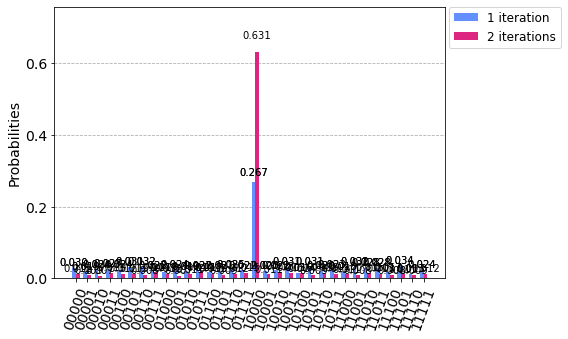

In [9]:
from qiskit.tools.visualization import plot_histogram

# Extract bit string with highest probability from results as the answer
result_dict = result.quasi_dists[1]
answer = max(result_dict, key=result_dict.get)
print(f"As you can see, the quantum computer returned '{answer}' as the answer with highest probability.\n"
       "And the results with 2 iterations have higher probability than the results with 1 iteration."
)

# Plot the results
plot_histogram(result.quasi_dists, legend=['1 iteration', '2 iterations'])

In [10]:
# Print the result and the correct answer.
print(f"Quantum answer: {answer}")
print(f"Correct answer: {secret_string}")
print('Success!' if answer == secret_string else 'Failure!')

Quantum answer: 10000
Correct answer: 10000
Success!


In [11]:
qiskit_ibm_runtime.version.get_version_info()

'0.4.0'